# `radames/instruct-pix2pix-img2img`

## Description
Generate an image based on user command on a source image. For example, user can input a sunflower picture as source image, and give command "Swap sunflowers with roses". This model would then generate a new image with everything else same as the source image, but only with sunflowers replaced by roses.

## Running environment
- 1 GPU, 8 CPU (recommended), 4G memory
- Custom notebook image: `projects.registry.vmware.com/models/notebook/inference:cv-pytorch-gpu-v3`

## Model inference

Install packages. 

*Note* that if you are using custom notebook image listed above, you **do not** need to isntall `transformers` here. 

`accelerate` is for GPU. So if you do not use GPU (not recommended), you may not need this package.

`douban` source is used here.

In [1]:
# DO NOT NEED if use above provided image to create Notebook Serve
!pip install diffusers accelerate safetensors transformers -i https://pypi.douban.com/simple/

Looking in indexes: https://pypi.douban.com/simple/
     |████████████████████████████████| 1.3 MB 1.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.


Import packages.

In [2]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Avoid HTTPS proxy error if necessary.

In [3]:
import os
# os.environ['HTTP_PROXY'] = <your_http_proxy>
# os.environ['HTTPS_PROXY'] = <your_https_proxy>
# os.environ['CURL_CA_BUNDLE'] = ''

Setup model inference pipeline.

Here we are using GPU. If you do not want to use GPU (not recommended), you can set 

In [4]:
model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]



Fetching 13 files:   8%|▊         | 1/13 [00:01<00:14,  1.19s/it]







































































































































































Fetching 13 files:  38%|███▊      | 5/13 [01:59<03:22, 25.32s/it]




















































































































































































































































































Fetching 13 files: 100%|██████████| 13/13 [07:15<00:00, 33.51s/it]


In [5]:
url = "https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg"

In [7]:
def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image
image = download_image(url)

100%|██████████| 10/10 [00:01<00:00,  9.11it/s]


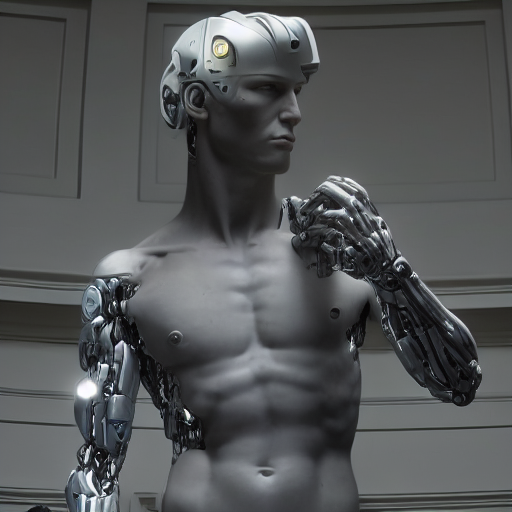

In [8]:
prompt = "turn him into cyborg"
images = pipe(prompt, image=image, num_inference_steps=10, image_guidance_scale=1).images
images[0]